## plot error only strawman
### dataset
### algo

In [1]:
import pickle
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np
import random
import json

from result_plots.QuerySketch.common.common import read_data, get_metric_mapping
from result_plots.QuerySketch.common.process_data_from_solver import get_mean_from_iterations, normalize_error_result, get_ensemble_error
from result_plots.QuerySketch.common.plot import get_result_from_pkl, get_x_position, get_xtick_position, \
                                                 get_gain, gain_over_strawman, consolidate_gain_over_strawman # , plot_raw

---

## Plotting functions

In [39]:
## Plot raw result
def plot_raw(ret_sol1, ret_sol2, ret_sol3, ret_sol4, ret_us, \
             name, all_metrics = ['hh', 'change_det', 'entropy', 'card', 'fsd'], isSaveFig = False):
    ## comparison version plot
    # box plot 
    # https://www.geeksforgeeks.org/box-plot-in-python-using-matplotlib/
    # Box plots with custom fill colors
    # https://matplotlib.org/stable/gallery/statistics/boxplot_color.html

    import matplotlib.patches as mpatches
    
    metric_to_label = {}
    # metric_to_label['hh'] = 'H'
    # metric_to_label['entropy'] = 'E'
    # metric_to_label['card'] = 'C'
    # metric_to_label['fsd'] = 'F'
    # metric_to_label['change_det'] = 'D'
    metric_to_label['hh'] = 'Heavy\nHitter'
    metric_to_label['entropy'] = 'Entropy'
    metric_to_label['card'] = 'Cardinality'
    metric_to_label['fsd'] = 'Flow Size\nDistribution'
    metric_to_label['change_det'] = 'Change\nDetection'

    xlabels = []
    for m in all_metrics:
        xlabels.append(metric_to_label[m])
    
    colors = ['deeppink', 'darkred', 'royalblue', 'darkblue']
    colors = colors * len(xlabels)

    fig = plt.figure(figsize = (10, 6))
    # Creating axes instance
    ax = fig.add_axes([0, 0, 1, 1])

    plot_list = []
    for m in all_metrics:
        plot_list.append(ret_sol1[m])
        plot_list.append(ret_sol2[m])
        plot_list.append(ret_sol3[m])
        plot_list.append(ret_sol4[m])
        # plot_list.append(ret_us[m])

    # Creating plot
    bplot = ax.boxplot(x=plot_list, 
                       positions = get_x_position(len(all_metrics), 4),
                       patch_artist=True)
    # ax.set_xlim(0, 1)
    ax.set_ylim([0, 105])

    for patch, color in zip(bplot['boxes'], colors):
        patch.set_facecolor(color)
        
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    plt.ylabel("Normalized error (%)", fontsize=28)
    # plt.xlabel("Available metrics", fontsize=28)
    plt.xticks(get_xtick_position(len(all_metrics), 4), xlabels, fontsize=26)
    plt.yticks(fontsize=26)
    
    # textstr = 'H: Heavy Hitter    E: Entropy \nC: Cardinality       F: Flow Size Distribution \nD: Change Detection'
    # textstr = 'FSD: Flow Size Distribution'
    # props = dict(boxstyle='round', facecolor='wheat', alpha=0)
    # ax.text(0.01, 0.07, textstr, transform=ax.transAxes, fontsize=20,
    #         verticalalignment='top', bbox=props)

    # plt.title(f"Error - {name}", fontsize=18)

    # create legends
    legend_patch = []
    legend_patch.append(mpatches.Patch(color=colors[0], label='Random-Uniform'))
    legend_patch.append(mpatches.Patch(color=colors[1], label='Random-Proportional'))
    legend_patch.append(mpatches.Patch(color=colors[2], label='Lazy-Uniform'))
    legend_patch.append(mpatches.Patch(color=colors[3], label='Lazy-Proportional'))
    plt.legend(handles=legend_patch, fontsize=20, frameon=False) # , loc="upper right"

    # import pickle
    # with open(f'pickles/{name}.pkl', 'wb') as fout:
    #     pickle.dump(fig, fout)
    # plt.savefig(f'figures/{name}.pdf', format='pdf', bbox_inches='tight')

    # show plot
    plt.show()

In [28]:
def call_plotting(ret_sol1, ret_sol2, ret_sol3, ret_sol4, ret_us, name = "Test", \
                  mem_size = 131072, all_metrics = ['hh', 'change_det', 'entropy', 'card', 'fsd'], isSaveFig = False):
    plot_raw(ret_sol1, ret_sol2, ret_sol3, ret_sol4, ret_us, name, all_metrics, isSaveFig)

## Common variables

In [29]:
seeds = [1, 2, 3, 4, 5]
count = 1

flowkeys = ["dstIP,dstPort",]
epochs = ['30']
datasets = ['equinix-nyc.dirA.20180517-130900.UTC.anon.pcap/', 'equinix-nyc.dirA.20180517-131000.UTC.anon.pcap/', 'equinix-nyc.dirA.20180517-131100.UTC.anon.pcap/', 
           'equinix-nyc.dirA.20180621-130900.UTC.anon.pcap/', 'equinix-nyc.dirA.20180621-131000.UTC.anon.pcap/', 'equinix-nyc.dirA.20180621-131100.UTC.anon.pcap/', 
           'equinix-nyc.dirA.20180816-130900.UTC.anon.pcap/', 'equinix-nyc.dirA.20180816-131000.UTC.anon.pcap/', 'equinix-nyc.dirA.20180816-131100.UTC.anon.pcap/', ]

# datasets = ['equinix-nyc.dirA.20181018-130900.UTC.anon.pcap/', 'equinix-nyc.dirA.20181018-131000.UTC.anon.pcap/', 'equinix-nyc.dirA.20181018-131100.UTC.anon.pcap/', 
#            'equinix-nyc.dirA.20181115-130900.UTC.anon.pcap/', 'equinix-nyc.dirA.20181115-131000.UTC.anon.pcap/', 'equinix-nyc.dirA.20181115-131100.UTC.anon.pcap/', 
#            'equinix-nyc.dirA.20181220-130900.UTC.anon.pcap/', 'equinix-nyc.dirA.20181220-131000.UTC.anon.pcap/', 'equinix-nyc.dirA.20181220-131100.UTC.anon.pcap/', ]

isSaveFig = False

# all_metrics = ['hh', 'change_det', 'entropy', 'card', 'fsd']
all_metrics = ['hh', 'entropy', 'card', 'change_det', 'fsd']

In [30]:

## record ensemble error per box
global_ensemble_error = []

---

## Plot selection results

----

### Memory 131072

In [31]:
mem_size = 131072
name = f'Mem {int(mem_size/1024)} KB (same dataset)'

ret_sol1_ll = []
ret_sol2_ll = []
ret_sol3_ll = []
ret_sol4_ll = []
ret_us_ll = []

In [32]:

# ========== mem_131072_run_5.json ==========

#############################
ret_us = {} 

measure_list = ['hh', 'change_det', ]
algos = ['cs']
widths = [4096]
rows = [3]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_us = {**ret_us, **tmp}

measure_list = ['entropy', 'fsd', ]
algos = ['mrac']
widths = [2048]
rows = [1]
level = 8
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_us = {**ret_us, **tmp}

measure_list = ['card', ]
algos = ['hll']
widths = [16384]
rows = [1]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_us = {**ret_us, **tmp}

ret_us_ll.append(ret_us)

#############################
ret_sol1 = {} 

measure_list = ['hh', ]
algos = ['cm']
widths = [4096]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

measure_list = ['change_det', 'fsd', ]
algos = ['cs']
widths = [4096]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

measure_list = ['entropy', ]
algos = ['mrac']
widths = [1024]
rows = [1]
level = 8
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

measure_list = ['card', ]
algos = ['hll']
widths = [32768]
rows = [1]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

ret_sol1_ll.append(ret_sol1)

#############################
ret_sol1 = {} 

measure_list = ['hh', 'change_det', 'entropy', 'fsd', ]
algos = ['cs']
widths = [8192]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

measure_list = ['card', ]
algos = ['hll']
widths = [65536]
rows = [1]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

ret_sol1_ll.append(ret_sol1)

#############################
ret_sol1 = {} 

measure_list = ['hh', ]
algos = ['cm']
widths = [4096]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

measure_list = ['change_det', ]
algos = ['cs']
widths = [4096]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

measure_list = ['entropy', 'fsd', ]
algos = ['mrac']
widths = [1024]
rows = [1]
level = 8
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

measure_list = ['card', ]
algos = ['hll']
widths = [32768]
rows = [1]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

ret_sol1_ll.append(ret_sol1)

#############################
ret_sol1 = {} 

measure_list = ['hh', ]
algos = ['univmon']
widths = [256]
rows = [2]
level = 16
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

measure_list = ['change_det', 'fsd', ]
algos = ['cm']
widths = [4096]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

measure_list = ['entropy', ]
algos = ['mrac']
widths = [1024]
rows = [1]
level = 8
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

measure_list = ['card', ]
algos = ['mrb']
widths = [32768]
rows = [1]
level = 8
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

ret_sol1_ll.append(ret_sol1)

#############################
ret_sol1 = {} 

measure_list = ['hh', ]
algos = ['univmon']
widths = [256]
rows = [2]
level = 16
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

measure_list = ['change_det', 'fsd', ]
algos = ['cm']
widths = [4096]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

measure_list = ['entropy', ]
algos = ['mrac']
widths = [1024]
rows = [1]
level = 8
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

measure_list = ['card', ]
algos = ['lc']
widths = [262144]
rows = [1]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

ret_sol1_ll.append(ret_sol1)

#############################
ret_sol2 = {} 

measure_list = ['hh', ]
algos = ['cm']
widths = [2048]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

measure_list = ['change_det', 'fsd', ]
algos = ['cs']
widths = [4096]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

measure_list = ['entropy', ]
algos = ['mrac']
widths = [512]
rows = [1]
level = 8
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

measure_list = ['card', ]
algos = ['hll']
widths = [16384]
rows = [1]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

ret_sol2_ll.append(ret_sol2)

#############################
ret_sol2 = {} 

measure_list = ['hh', 'change_det', 'entropy', 'fsd', ]
algos = ['cs']
widths = [8192]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

measure_list = ['card', ]
algos = ['hll']
widths = [16384]
rows = [1]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

ret_sol2_ll.append(ret_sol2)

#############################
ret_sol2 = {} 

measure_list = ['hh', ]
algos = ['cm']
widths = [2048]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

measure_list = ['change_det', ]
algos = ['cs']
widths = [2048]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

measure_list = ['entropy', 'fsd', ]
algos = ['mrac']
widths = [1024]
rows = [1]
level = 8
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

measure_list = ['card', ]
algos = ['hll']
widths = [16384]
rows = [1]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

ret_sol2_ll.append(ret_sol2)

#############################
ret_sol2 = {} 

measure_list = ['hh', ]
algos = ['univmon']
widths = [128]
rows = [2]
level = 16
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

measure_list = ['change_det', 'fsd', ]
algos = ['cm']
widths = [4096]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

measure_list = ['entropy', ]
algos = ['mrac']
widths = [512]
rows = [1]
level = 8
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

measure_list = ['card', ]
algos = ['mrb']
widths = [16384]
rows = [1]
level = 8
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

ret_sol2_ll.append(ret_sol2)

#############################
ret_sol2 = {} 

measure_list = ['hh', ]
algos = ['univmon']
widths = [128]
rows = [2]
level = 16
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

measure_list = ['change_det', 'fsd', ]
algos = ['cm']
widths = [4096]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

measure_list = ['entropy', ]
algos = ['mrac']
widths = [512]
rows = [1]
level = 8
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

measure_list = ['card', ]
algos = ['lc']
widths = [131072]
rows = [1]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

ret_sol2_ll.append(ret_sol2)

#############################
ret_sol3 = {} 

measure_list = ['hh', 'entropy', 'card', ]
algos = ['univmon']
widths = [256]
rows = [2]
level = 16
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol3 = {**ret_sol3, **tmp}

measure_list = ['change_det', ]
algos = ['cm']
widths = [4096]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol3 = {**ret_sol3, **tmp}

measure_list = ['fsd', ]
algos = ['mrac']
widths = [1024]
rows = [1]
level = 8
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol3 = {**ret_sol3, **tmp}

ret_sol3_ll.append(ret_sol3)

#############################
ret_sol3 = {} 

measure_list = ['hh', 'entropy', 'card', ]
algos = ['univmon']
widths = [256]
rows = [2]
level = 16
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol3 = {**ret_sol3, **tmp}

measure_list = ['change_det', ]
algos = ['cs']
widths = [4096]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol3 = {**ret_sol3, **tmp}

measure_list = ['fsd', ]
algos = ['cm']
widths = [4096]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol3 = {**ret_sol3, **tmp}

ret_sol3_ll.append(ret_sol3)

#############################
ret_sol3 = {} 

measure_list = ['hh', 'entropy', 'card', ]
algos = ['univmon']
widths = [256]
rows = [2]
level = 16
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol3 = {**ret_sol3, **tmp}

measure_list = ['change_det', ]
algos = ['cm']
widths = [4096]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol3 = {**ret_sol3, **tmp}

measure_list = ['fsd', ]
algos = ['mrac']
widths = [1024]
rows = [1]
level = 8
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol3 = {**ret_sol3, **tmp}

ret_sol3_ll.append(ret_sol3)

#############################
ret_sol3 = {} 

measure_list = ['hh', 'entropy', 'card', ]
algos = ['univmon']
widths = [512]
rows = [2]
level = 16
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol3 = {**ret_sol3, **tmp}

measure_list = ['change_det', 'fsd', ]
algos = ['cm']
widths = [8192]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol3 = {**ret_sol3, **tmp}

ret_sol3_ll.append(ret_sol3)

#############################
ret_sol3 = {} 

measure_list = ['hh', 'entropy', 'card', ]
algos = ['univmon']
widths = [256]
rows = [2]
level = 16
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol3 = {**ret_sol3, **tmp}

measure_list = ['change_det', ]
algos = ['cm']
widths = [4096]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol3 = {**ret_sol3, **tmp}

measure_list = ['fsd', ]
algos = ['cs']
widths = [4096]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol3 = {**ret_sol3, **tmp}

ret_sol3_ll.append(ret_sol3)

#############################
ret_sol4 = {} 

measure_list = ['hh', 'entropy', 'card', ]
algos = ['univmon']
widths = [512]
rows = [2]
level = 16
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol4 = {**ret_sol4, **tmp}

measure_list = ['change_det', ]
algos = ['cm']
widths = [2048]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol4 = {**ret_sol4, **tmp}

measure_list = ['fsd', ]
algos = ['mrac']
widths = [512]
rows = [1]
level = 8
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol4 = {**ret_sol4, **tmp}

ret_sol4_ll.append(ret_sol4)

#############################
ret_sol4 = {} 

measure_list = ['hh', 'entropy', 'card', ]
algos = ['univmon']
widths = [512]
rows = [2]
level = 16
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol4 = {**ret_sol4, **tmp}

measure_list = ['change_det', ]
algos = ['cs']
widths = [2048]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol4 = {**ret_sol4, **tmp}

measure_list = ['fsd', ]
algos = ['cm']
widths = [2048]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol4 = {**ret_sol4, **tmp}

ret_sol4_ll.append(ret_sol4)

#############################
ret_sol4 = {} 

measure_list = ['hh', 'entropy', 'card', ]
algos = ['univmon']
widths = [512]
rows = [2]
level = 16
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol4 = {**ret_sol4, **tmp}

measure_list = ['change_det', ]
algos = ['cm']
widths = [2048]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol4 = {**ret_sol4, **tmp}

measure_list = ['fsd', ]
algos = ['mrac']
widths = [512]
rows = [1]
level = 8
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol4 = {**ret_sol4, **tmp}

ret_sol4_ll.append(ret_sol4)

#############################
ret_sol4 = {} 

measure_list = ['hh', 'entropy', 'card', ]
algos = ['univmon']
widths = [512]
rows = [2]
level = 16
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol4 = {**ret_sol4, **tmp}

measure_list = ['change_det', 'fsd', ]
algos = ['cm']
widths = [4096]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol4 = {**ret_sol4, **tmp}

ret_sol4_ll.append(ret_sol4)

#############################
ret_sol4 = {} 

measure_list = ['hh', 'entropy', 'card', ]
algos = ['univmon']
widths = [512]
rows = [2]
level = 16
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol4 = {**ret_sol4, **tmp}

measure_list = ['change_det', ]
algos = ['cm']
widths = [2048]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol4 = {**ret_sol4, **tmp}

measure_list = ['fsd', ]
algos = ['cs']
widths = [2048]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol4 = {**ret_sol4, **tmp}

ret_sol4_ll.append(ret_sol4)


Num of run: 5
max_list: {'hh': 301.6471806979313, 'entropy': 300.2351504598513, 'card': 20.52014497398337, 'change_det': 29.584133011704417, 'fsd': 1.7401845247724856}


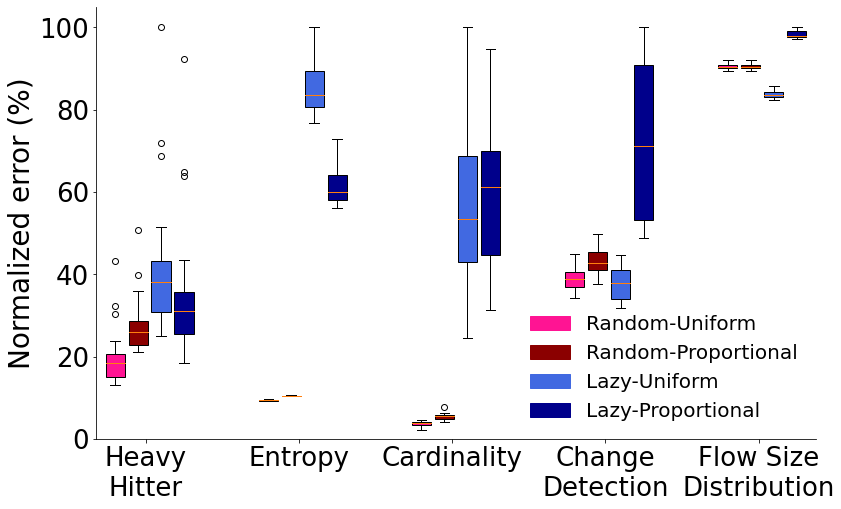

In [38]:
## pre-processing data
ret_sol1, ret_sol2, ret_sol3, ret_sol4, ret_us = get_mean_from_iterations(ret_sol1_ll, ret_sol2_ll, ret_sol3_ll, ret_sol4_ll, ret_us_ll, all_metrics)
ret_sol1, ret_sol2, ret_sol3, ret_sol4, ret_us = normalize_error_result(ret_sol1, ret_sol2, ret_sol3, ret_sol4, ret_us, all_metrics)
## Get & record ensemble error
global_ensemble_error = get_ensemble_error(ret_sol1, ret_sol2, ret_sol3, ret_sol4, ret_us, all_metrics, global_ensemble_error)
## call plotting
call_plotting(ret_sol1, ret_sol2, ret_sol3, ret_sol4, ret_us, 'naive_solution_comparison', mem_size, all_metrics, isSaveFig)

### Save plot data as json

In [26]:
# Save data as json
isDumpJson = False

if isDumpJson:
#     # save gain result
#     ll = []
#     for arr in global_merge_gain_all_mem:
#         ll.append(arr.tolist())
#     with open('results/figure_data/naive_solution_comparison.json', 'w') as out:
#         json.dump(ll, out)
        
    # save ensemble error
    ll = []
    for arr in global_ensemble_error:
        ll.append(arr.tolist())
    with open('results/figure_data/naive_solution_comparison.json', 'w') as out:
        json.dump(ll, out)